<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcQ-VfNtOyJbsaxu43Kztf_cv1mgBG6ZIQZEVw&usqp=CAU'>

# Procesamiento de Lenguage Natural

## Taller #8: Agrupación de textos
`Fecha de entrega: Abril 29, 2021. (Antes del inicio de la próxima clase).`

`Modo de entrega: Subir link de GitHub al aula virtual.`

In [191]:
import re
import json
import pandas as pd

from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import iplot

In [9]:
data = pd.read_csv('reviews_vidjew_es.csv')
data.head()

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games


###  `[10 pts]` Punto 1: Hacer pre-procesamiento del texto

In [24]:
import re
from sklearn.feature_extraction.text import TfidfVectorizer

def pre_procesado(texto):
    texto = texto.lower()
    texto = re.sub(r"[\W\d]+", " ", texto)
    return texto

tfidf_vect = TfidfVectorizer(preprocessor=pre_procesado)
tfidf = tfidf_vect.fit_transform(data.review_body.values)
tfidf_matrix = pd.DataFrame(tfidf.toarray(), columns = tfidf_vect.get_feature_names())
tfidf_matrix

,abajo,abalorio,abalorios,abaratar,abate,abierta,abierto,ablar,aboné,abre,...,éste,éxito,ópticas,última,últimas,últimos,única,únicamente,único,útil
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


###  `[10 pts]` Punto 2: Método del codo para determinar $K$

In [201]:
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt
import numpy as np

In [230]:
ks = []
k_inertias = []

for k in range(1,20):
    kmeans = KMeans(n_clusters=k).fit(tfidf_matrix)
    k_inertia = kmeans.inertia_
    
    ks.append(k)
    k_inertias.append(k_inertia)    

In [ ]:
list (zip(ks,k_inertias))

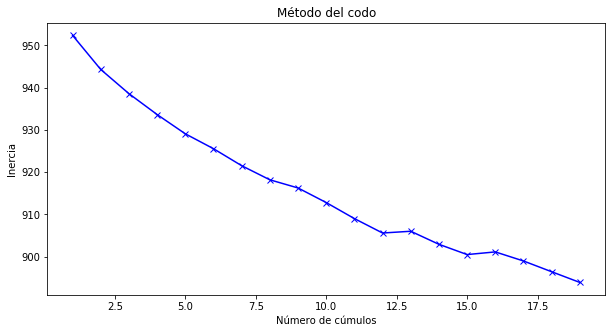

In [242]:
plt.figure(figsize=(10,5))
plt.xlabel("Número de cúmulos")
plt.ylabel("Inercia")
plt.title("Método del codo")
plt.plot(ks, k_inertias, 'bx-');
plt.show()

###  `[10 pts]` Punto 3: Entrenar modelo con el $K$ escogido

In [308]:
k = 5
model = KMeans(n_clusters=k)
model.fit(tfidf_matrix)

KMeans(n_clusters=5)

In [309]:
data['cluster'] = model.labels_
data

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,Número_clusters
0,es_0825565,product_es_0370490,reviewer_es_0174781,3,"Buen. Buena calidad, y buena presentación.",Contenta,es,jewelry,3,clusters2
1,es_0227934,product_es_0354224,reviewer_es_0411613,3,"Un producto a perfecto, para salir de casa con...",Versatilidad,es,video_games,1,clusters1
2,es_0468601,product_es_0665460,reviewer_es_0348315,1,No funciona con Nintendo Switch. No hay forma ...,Decepción absoluta,es,video_games,1,clusters0
3,es_0814494,product_es_0692692,reviewer_es_0951508,5,"Recomendado, los utilizo para pc y no me dan n...",Auriculares Pecham ps4,es,video_games,1,clusters0
4,es_0206329,product_es_0728826,reviewer_es_0493255,4,El cable funciona bien podria ser un poco mas ...,Perfecto,es,video_games,4,clusters2
...,...,...,...,...,...,...,...,...,...,...
995,es_0427672,product_es_0899883,reviewer_es_0474735,2,En la foto parece que la cadena sea más gruesa...,Cadena muy fina,es,jewelry,2,clusters2
996,es_0059540,product_es_0702564,reviewer_es_0754753,3,"Bien por su precio, la cadena demasiado fina.",E,es,jewelry,3,clusters2
997,es_0303349,product_es_0678671,reviewer_es_0172313,5,Muy bien!! Ahora tengo organizados los pendien...,Bonito,es,jewelry,4,clusters2
998,es_0659961,product_es_0294943,reviewer_es_0554554,4,"Las tapas para los joystics no están nada mal,...",No está mal pero sólo he probado las fundas.,es,video_games,2,clusters1


###  `[15 pts]` Punto 4: Interpretación de los clusters

In [310]:
nbrs = NearestNeighbors(n_neighbors=4, metric='euclidean').fit(tfidf_matrix.values)

clust_cnt = data['cluster'].value_counts()
clust_cnt_pct = data['cluster'].value_counts(normalize=True)

centroides = model.cluster_centers_

terms = tfidf_vect.get_feature_names()
order_centroids = centroids.argsort()[:, ::-1]

for i in range(k):
    print(f"Cluster # {i}")
    print(f"COUNT {clust_cnt[i]} comments ({clust_cnt_pct[i]:.2%} of the data)")
    print()
    
    print("TERMS")
    for ind in order_centroids[i][:20]:
        print(terms[ind], end=" ")
    print()
    print()
    
    print(f"REPRESENTATIVE COMMENTS")
    for vecino in data.iloc[nbrs.kneighbors([centroides[i]])[1][0]].review_body.values:
        print(f" *** {vecino}")
        print()
        
    print()
    print("*****************************************************************************")
    print()



Cluster # 0
COUNT 128 comments (12.80% of the data)

TERMS
en juego el caja la no español está jugar que de para por del con es pero me bien divertido 

REPRESENTATIVE COMMENTS
 *** No me ha gustado el juego.

 *** No me ha llegado aun

 *** No ha llegado el collar . Las demás cosas que he comprado en Amazon han llegado, pero este producto no me ha llegado.

 *** El producto ha llegado antes de lo previsto, me ha gustado su calidad es más pequeño de lo esperado pero me gusta. Vale la pena.


*****************************************************************************

Cluster # 1
COUNT 248 comments (24.80% of the data)

TERMS
la es muy bonito en pero foto que no de queda se bonita el pequeño como pulsera lo grande tal 

REPRESENTATIVE COMMENTS
 *** Fue para un regalo, le ha encantado y llegó de un día para otro.

 *** La pulsera es de muy buena calidad, la verdad es que era algo reacio a adquirir este tipo de regalos a través de Amazon, pero está pulsera me ha demostrado lo equivocado

###  `[BONUS: 3 pts]` Visualización usando PCA

In [313]:
clusters = {0: 'clusters0',
            1: "clusters1",
            2: 'clusters2',
            3: 'clusters3',
            4: 'clusters4',
            5: 'clusters5'}
           
        
data['Número_clusters'] = data['cluster'].apply(lambda val: clusters[val])
data.sample(7)

,review_id,product_id,reviewer_id,stars,review_body,review_title,language,product_category,cluster,Número_clusters
381,es_0234448,product_es_0122585,reviewer_es_0926301,3,"Por el precio están bien, pero el color no es ...",No son dorados,es,jewelry,2,clusters2
918,es_0868701,product_es_0085798,reviewer_es_0968948,4,Me ha gustado mucho. Cumple totalmente las exp...,Me ha gustado mucho. Cumple totalmente las exp...,es,jewelry,3,clusters3
532,es_0978122,product_es_0128736,reviewer_es_0313236,5,"La pulsera es muy bonita,tal y como sale en la...",Satisfecha con la compra,es,jewelry,1,clusters1
214,es_0021765,product_es_0885471,reviewer_es_0771074,5,"Me gustaron mucho, idénticos a la foto.",Mu buenos,es,jewelry,0,clusters0
878,es_0745495,product_es_0121497,reviewer_es_0258190,1,Una puta mierda que no me llegó.,Basura 🚮,es,jewelry,0,clusters0
528,es_0657011,product_es_0723812,reviewer_es_0867091,5,Los pendientes son como esperaba. Compré antes...,De buena calidad y muy bonitos.,es,jewelry,4,clusters4
670,es_0416528,product_es_0765739,reviewer_es_0005677,1,No tiene nada que ver la foto con lo que te ll...,No se parece la foto al collar,es,jewelry,2,clusters2


In [305]:
from sklearn.decomposition import PCA
import plotly.graph_objs as go
from plotly.offline import iplot

In [317]:
pca = PCA(n_components=2)

result = pca.fit_transform(tfidf_matrix)
result = pd.DataFrame(result)
result.columns = ['X', 'Y']
result['cluster'] = data.Número_clusters.values
result['review_body'] = data.review_body.apply(lambda val: val[:140])

colorsIdx = {'clusters0': 'Blue',
             'clusters1': 'Yellow',
             'clusters2': 'Green',
             'clusters3': 'Red',
             'clusters4': 'Cyan',
             'clusters5': 'Black'}     
                                

result['colores'] = result['cluster'].map(colorsIdx)

result.head()

,X,Y,cluster,review_body,colores
0,0.358167,0.053385,clusters3,"Buen. Buena calidad, y buena presentación.",Red
1,0.005287,0.078412,clusters1,"Un producto a perfecto, para salir de casa con...",Yellow
2,-0.033408,0.056236,clusters1,No funciona con Nintendo Switch. No hay forma ...,Yellow
3,0.025145,0.046280,clusters1,"Recomendado, los utilizo para pc y no me dan n...",Yellow
4,0.171159,-0.043450,clusters4,El cable funciona bien podria ser un poco mas ...,Cyan


In [316]:
trace = go.Scatter(x=result['X'].values,
                   y=result['Y'].values,
                   text=result['review_body'].values,
                   mode='markers',
                   marker=dict(color=result['colores'].values)) 

layout = go.Layout(title="PCA")

fig = go.Figure(data=trace, layout=layout)
iplot(fig)

### `[5 pts]` Punto 5: Preguntas

- Según los resultados del $K$-Means, ¿cuál es la estructura de los datos?
- ¿Qué diferencia notó entre los resultados del taller pasado y este?
- ¿Alguna otra observación?

*Según los resultados del  𝐾 -Means, ¿cuál es la estructura de los datos?. Se evidencia que los datos son dispersos, como también se evidencian algunos datos atipicos.

*¿Qué diferencia notó entre los resultados del taller pasado y este?, que los modelos del taller anterior y este clasificaron casi los mismos terminos y palabras.